This is data of emergency calls from Emergency Calls for Montgomery County, PA.We will try to explore the dataset.This kernel is a work in process.I will be updating the kernel in the coming days.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/montcoalert/911.csv


**Importing Python Modules**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

**Importing the data**

In [3]:
df=pd.read_csv('../input/montcoalert/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


So in the dataset we have the place of the call,reason,address etc

**Summary of Dataset**

In [4]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 423909
Columns  : 9

Features :
     : ['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e']

Missing values    : 52288

Unique values :  
 lat           22661
lng           22680
desc         423837
zip             170
title           141
timeStamp    409544
twp              68
addr          36051
e                 1
dtype: int64


**Attributes**

In [5]:
df['twp'].values

array(['NEW HANOVER', 'HATFIELD TOWNSHIP', 'NORRISTOWN', ...,
       'LOWER SALFORD', 'LOWER GWYNEDD', 'LOWER GWYNEDD'], dtype=object)

In [6]:
df.index

RangeIndex(start=0, stop=423909, step=1)

In [7]:
df['lat'].dtype

dtype('float64')

**From where the calls come most?**

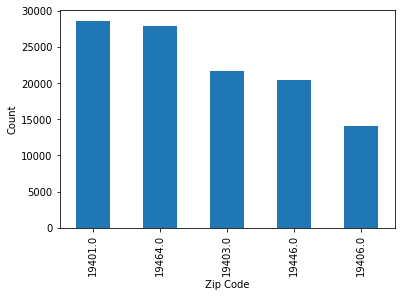

In [8]:
df['zip'].value_counts().head(5).plot.bar();
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.show()

Maximum Call comes from Zip Code 19401 which is a place called as Norristown in Pennsylvania, United States.

**Which are top townships for calls?**

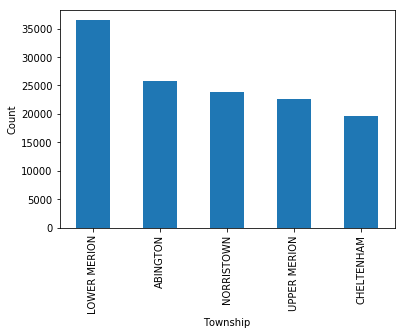

In [9]:
df['twp'].value_counts().head(5).plot.bar();
plt.xlabel('Township')
plt.ylabel('Count')
plt.show()

Lower Merion township has the highest number of calls.

**How many Unique title?******

In [10]:
len(df['title'].unique())

141

Or we can use the command

In [11]:
df['title'].nunique()

141

**Creating a columns with reason:**
The title column have the general reason for the call with the more detailed reason for the the call.There are three basic category for the call like EMS,Fire and Traffic

In [12]:
x=df['title'].iloc[0]

In [13]:
x.split(':')[0]

'EMS'

In [14]:
df['Reason']=df['title'].apply(lambda x:x.split(':')[0])
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

With Above Transformations we have managed to create a columns with title reason having the values EMS,Fire and Traffic.

**What is reason for most calls?**

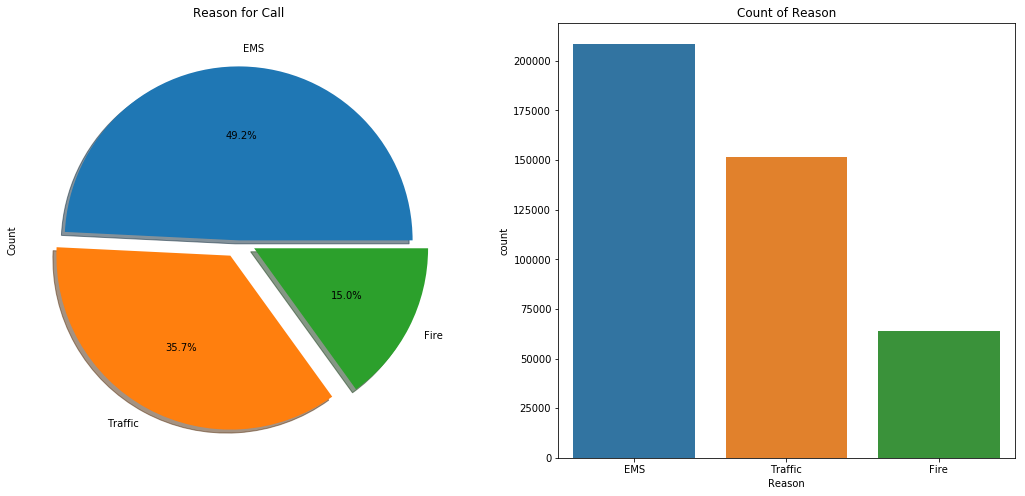

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Reason'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Reason for Call')
ax[0].set_ylabel('Count')
sns.countplot('Reason',data=df,ax=ax[1],order=df['Reason'].value_counts().index)
ax[1].set_title('Count of Reason')
plt.show()

49% call are for medical emergency followed by Traffic and Fire.

**Working with Time Data**

In [16]:
type(df['timeStamp'].iloc[0])

str

Data about time is of time string.We need to convert it into Datetime Format.

In [17]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [18]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
time=df['timeStamp'].iloc[0]
time.hour

17

In [20]:
time.year

2015

In [21]:
time.month

12

In [22]:
time.dayofweek

3

In [23]:
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)
df['Month']=df['timeStamp'].apply(lambda x:x.month)
df['DayOfWeek']=df['timeStamp'].apply(lambda x:x.dayofweek)

In [24]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

**Calls Per Month**

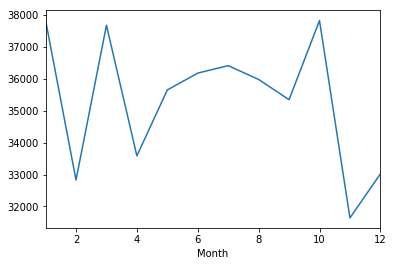

In [25]:
byMonth=df.groupby('Month').count()
byMonth['lat'].plot();

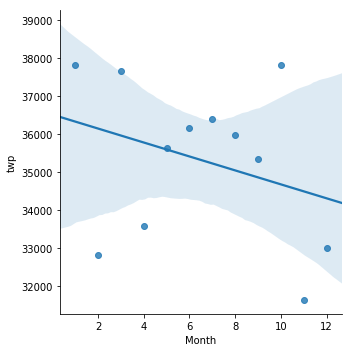

In [26]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index());

In [27]:
mmap={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [28]:
df['Month']=df['Month'].map(mmap)

In [29]:
df['DayOfWeek']=df['DayOfWeek'].map(dmap)

In [30]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Dec,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Dec,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,Dec,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,Dec,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,Dec,Thu


**Call during the Week?**

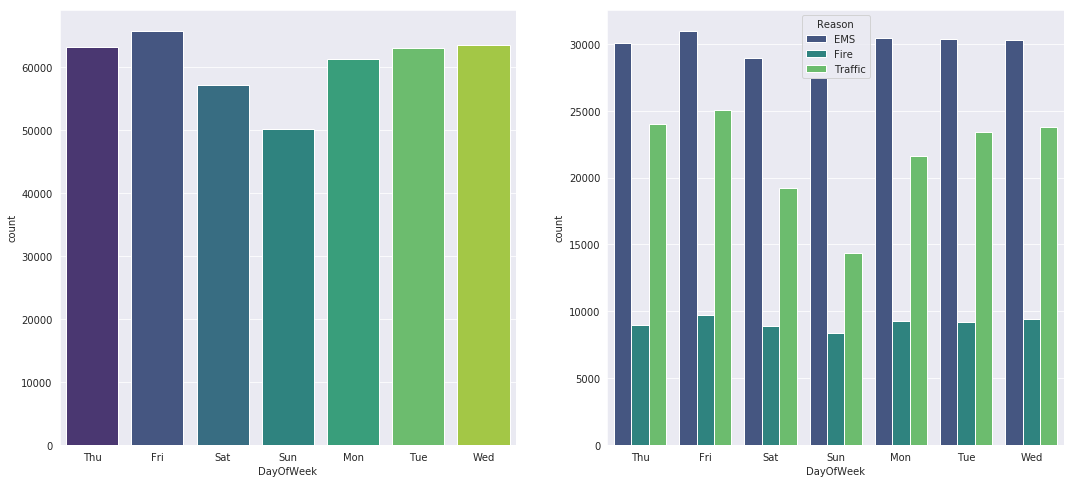

In [31]:
sns.set_style('darkgrid')
f,ax=plt.subplots(1,2,figsize=(18,8))
k1=sns.countplot(x='DayOfWeek',data=df,ax=ax[0],palette='viridis')
k2=sns.countplot(x='DayOfWeek',data=df,hue='Reason',ax=ax[1],palette='viridis')

More Emergency calls happen on Friday.EMS call are more.

**Call during the month?**

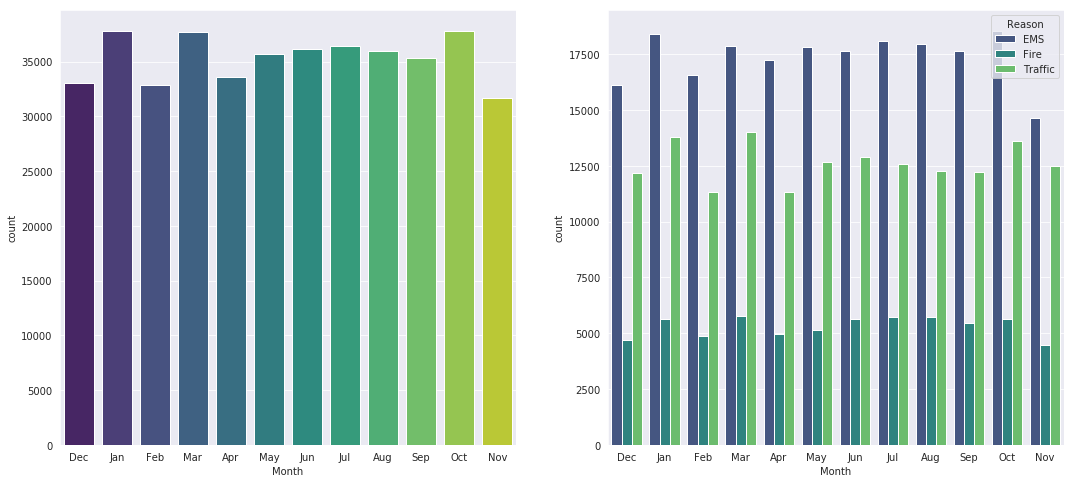

In [32]:
sns.set_style('darkgrid')
f,ax=plt.subplots(1,2,figsize=(18,8))
k1=sns.countplot(x='Month',data=df,ax=ax[0],palette='viridis')
k2=sns.countplot(x='Month',data=df,hue='Reason',ax=ax[1],palette='viridis')

We have more Emergency calls in the Months of Jan,Mar and Oct.

**Creating a Date Column**

In [33]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())

In [34]:
#df.head()

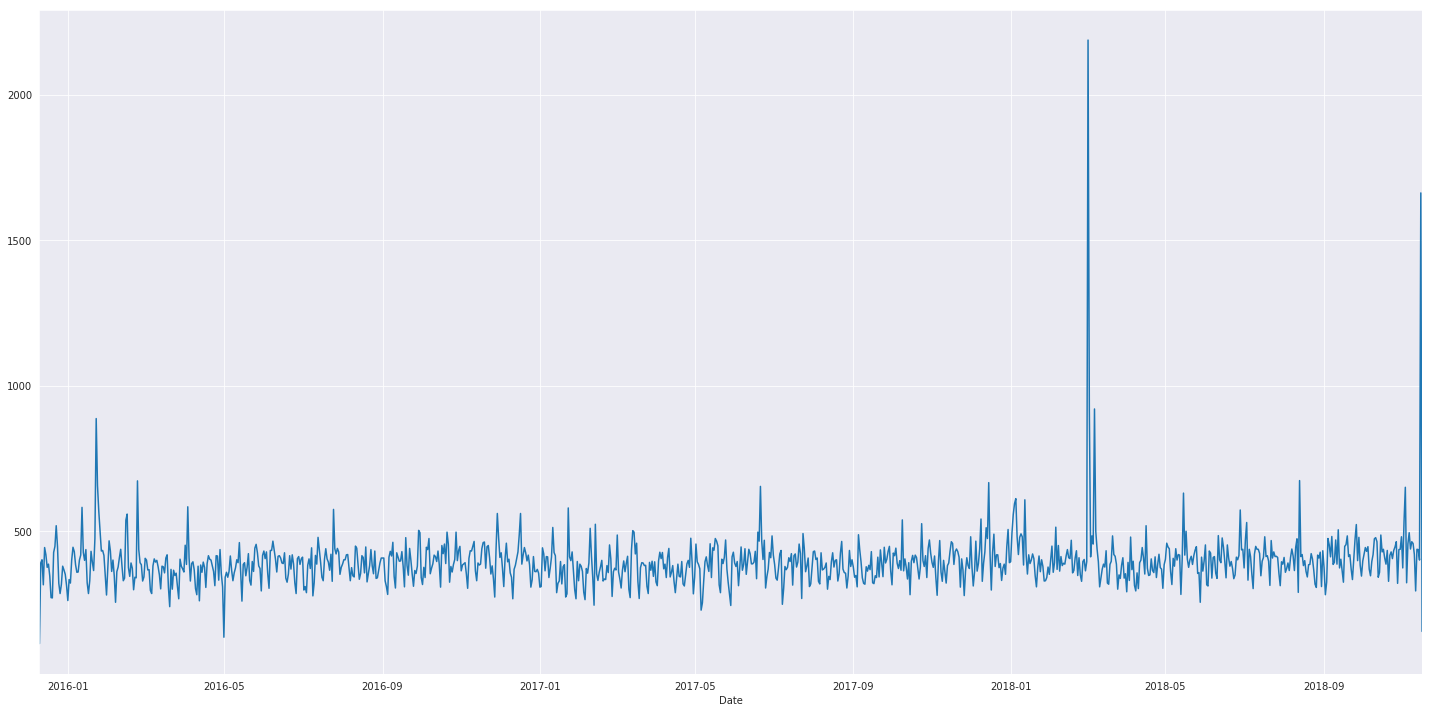

In [35]:
plt.figure(figsize=(20,10))
df.groupby('Date').count()['lat'].plot();
plt.tight_layout()

**PLotting per day Plot based on Reason******

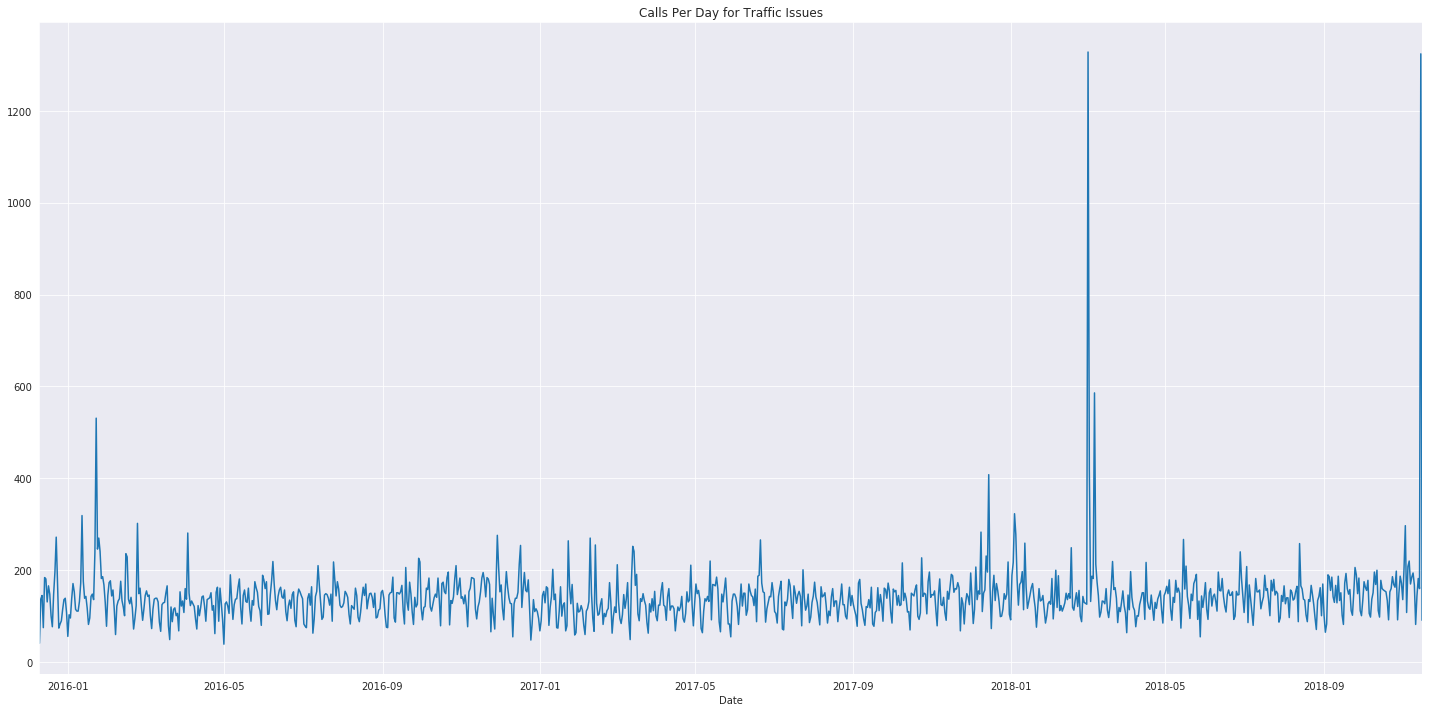

In [36]:
plt.figure(figsize=(20,10))
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot();
plt.title('Calls Per Day for Traffic Issues');
plt.tight_layout()

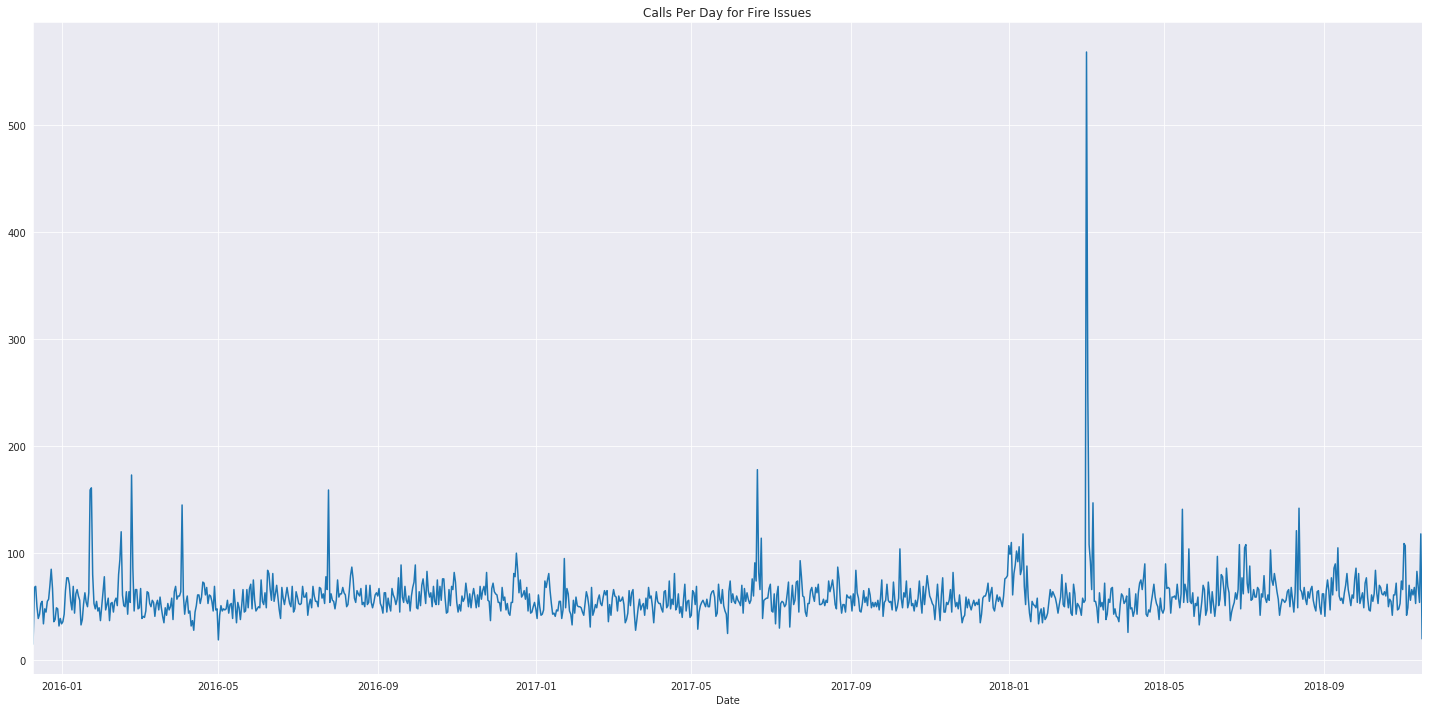

In [37]:
plt.figure(figsize=(20,10))
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot();
plt.title('Calls Per Day for Fire Issues');
plt.tight_layout()

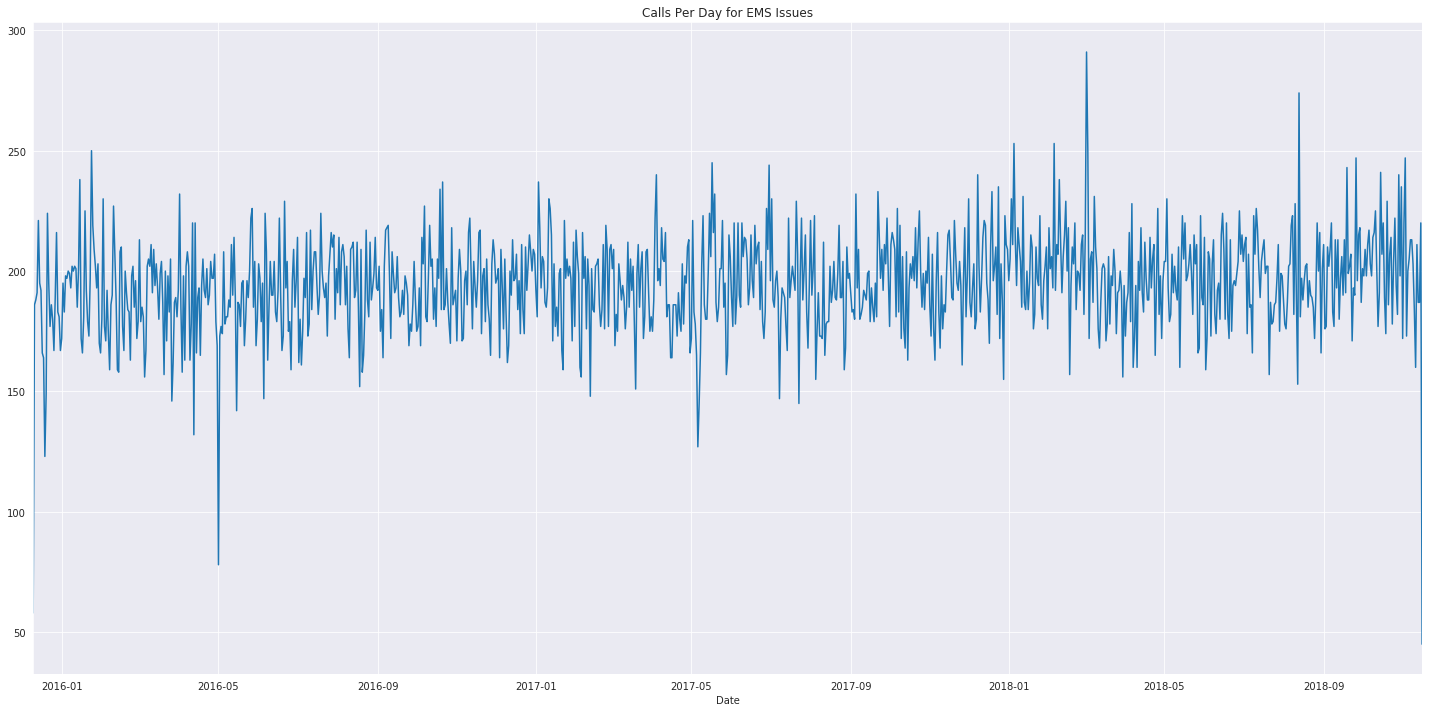

In [38]:
plt.figure(figsize=(20,10))
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot();
plt.title('Calls Per Day for EMS Issues');
plt.tight_layout()

**Creating Heatmaps based on day**

In [39]:
dayHour=df.groupby(by=['DayOfWeek','Hour']).count()['Reason'].unstack()

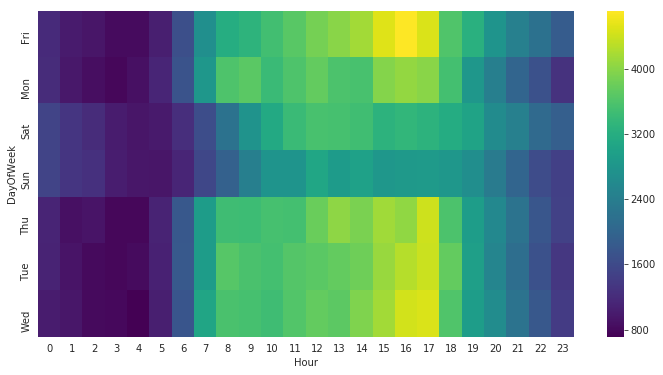

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis');

**Cluster Map based on day**

<Figure size 864x432 with 0 Axes>

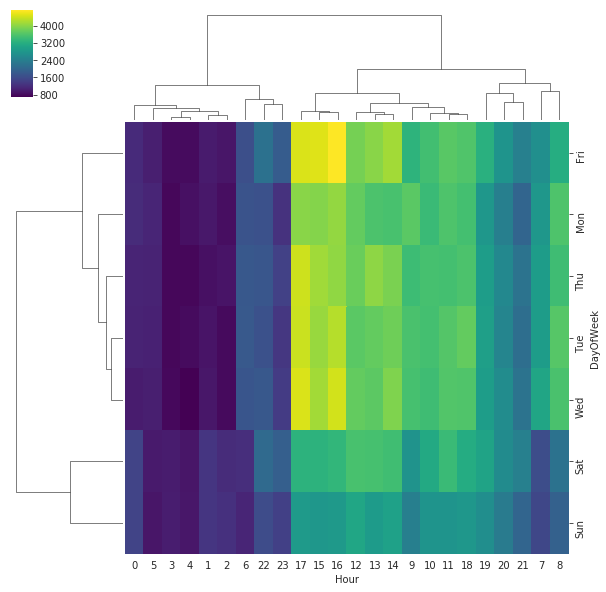

In [41]:
plt.figure(figsize=(12,6));
sns.clustermap(dayHour,cmap='viridis');

We can see from heatmap we can see that we have more calls on Friday and Wenesday between 15-17 Hours.More calls come in the Evening.Very Less calls during the Night time.We have very less 911 calls on weekends.

**Heat Map Based on Month**

In [42]:
dayMonth=df.groupby(by=['DayOfWeek','Month']).count()['Reason'].unstack()

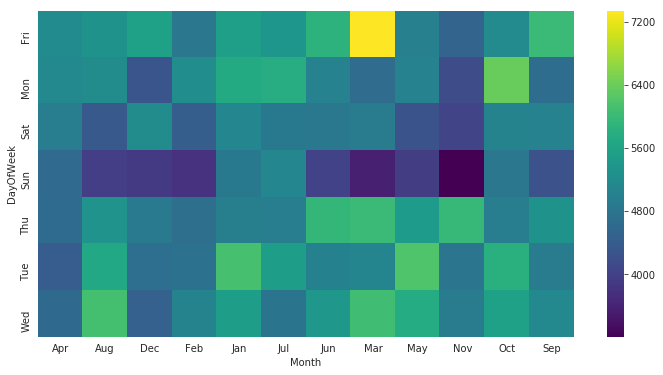

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis');

**Cluster Map Based on Month**

<Figure size 864x432 with 0 Axes>

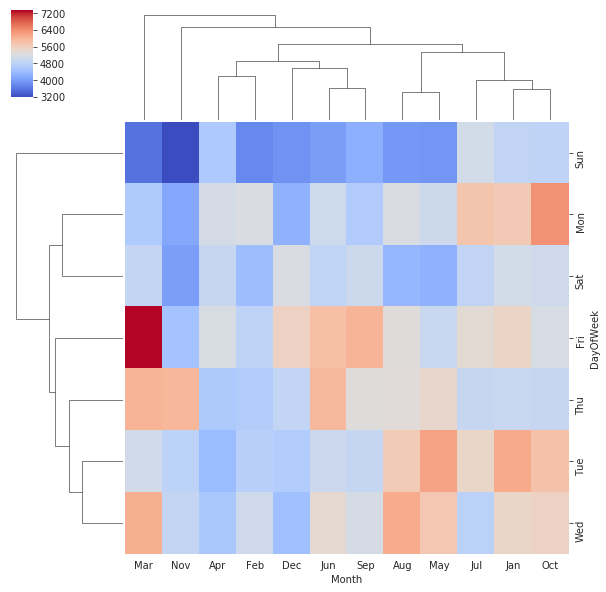

In [44]:
plt.figure(figsize=(12,6));
sns.clustermap(dayMonth,cmap='coolwarm');

We have the highest calls in month of March on Friday.